In [2]:

import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_custom_objects




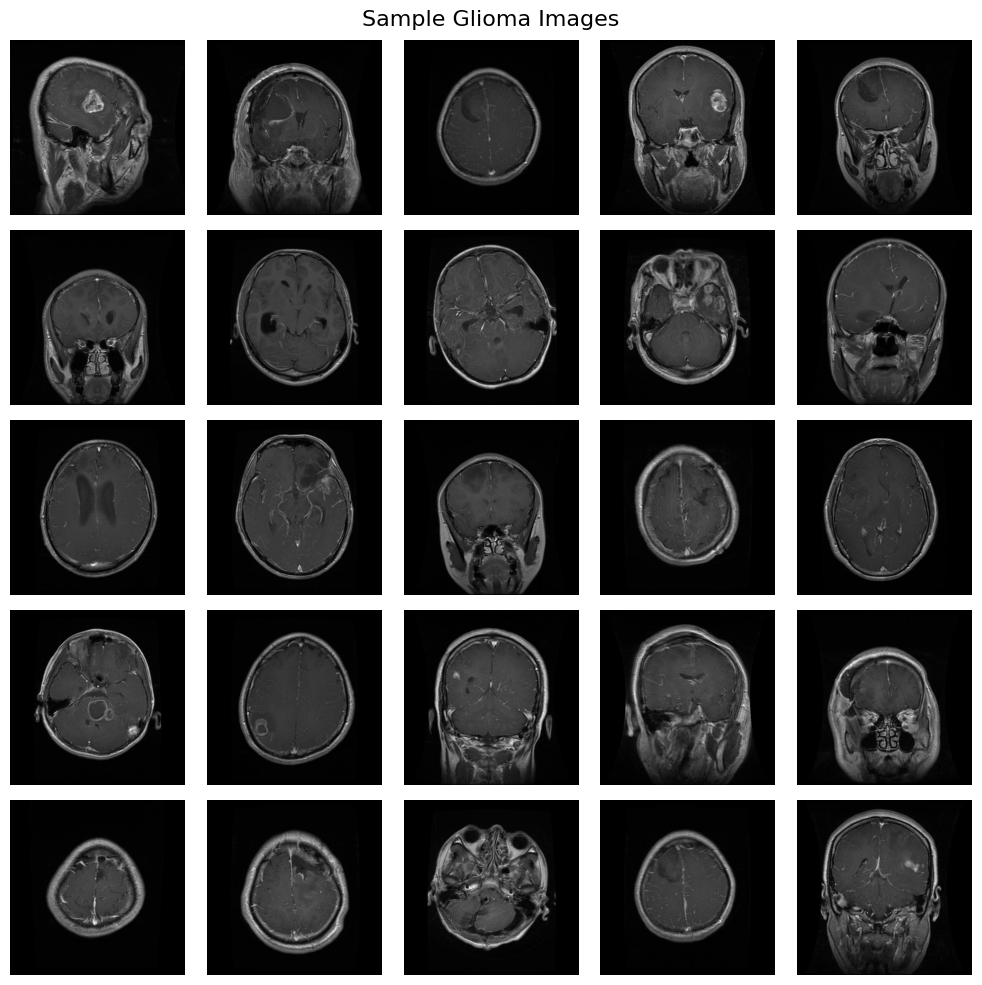

In [ ]:
glioma="dataset/Training/glioma"
image_fol= os.listdir(glioma)

plt.figure(figsize=(10, 10))

for i in range(25):
    image_p = os.path.join(glioma, image_fol[i])
    image = cv2.imread(image_p)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.suptitle('Sample Glioma Images', fontsize=16)
plt.tight_layout()
plt.show()

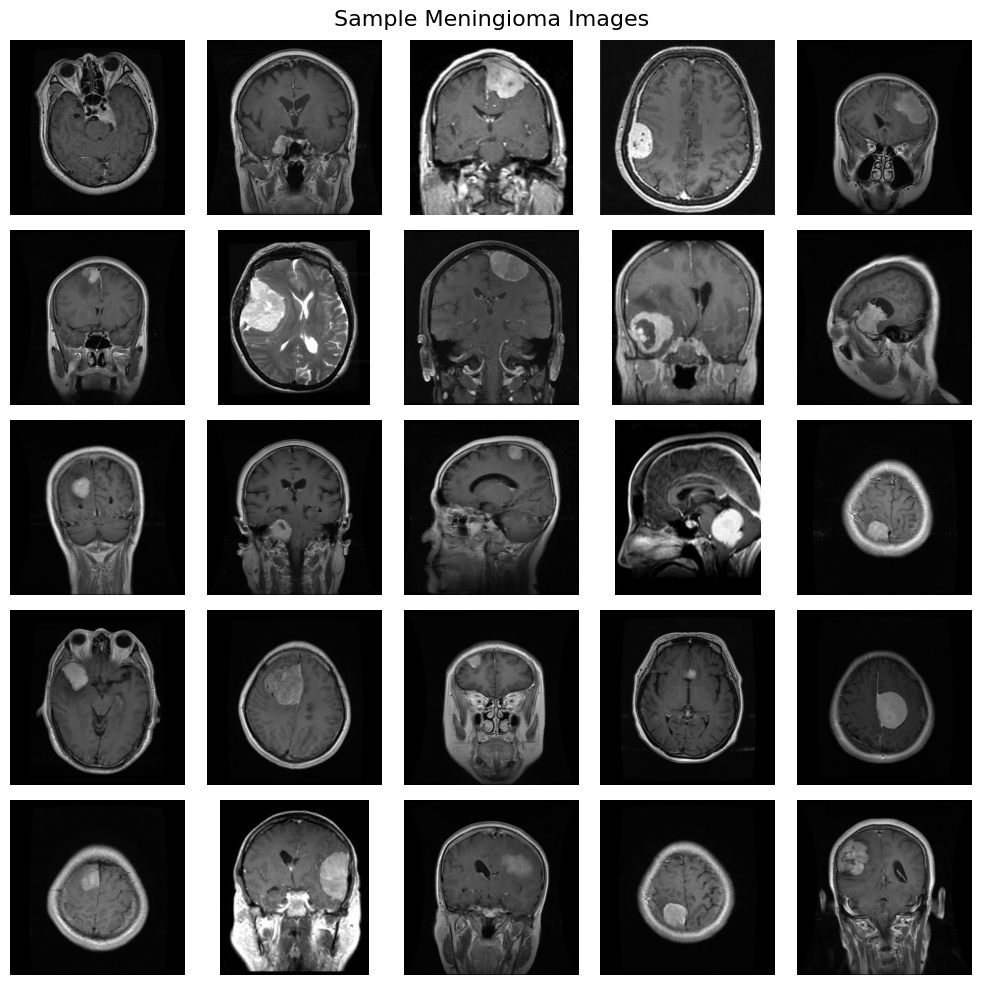

In [ ]:
meningioma_dir="dataset/Training/meningioma/"
image_fol= os.listdir(meningioma_dir)

plt.figure(figsize=(10, 10))

for i in range(25):
    image_p = os.path.join(meningioma_dir, image_fol[i])
    image = cv2.imread(image_p)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.suptitle('Sample Meningioma Images', fontsize=16)
plt.tight_layout()
plt.show()

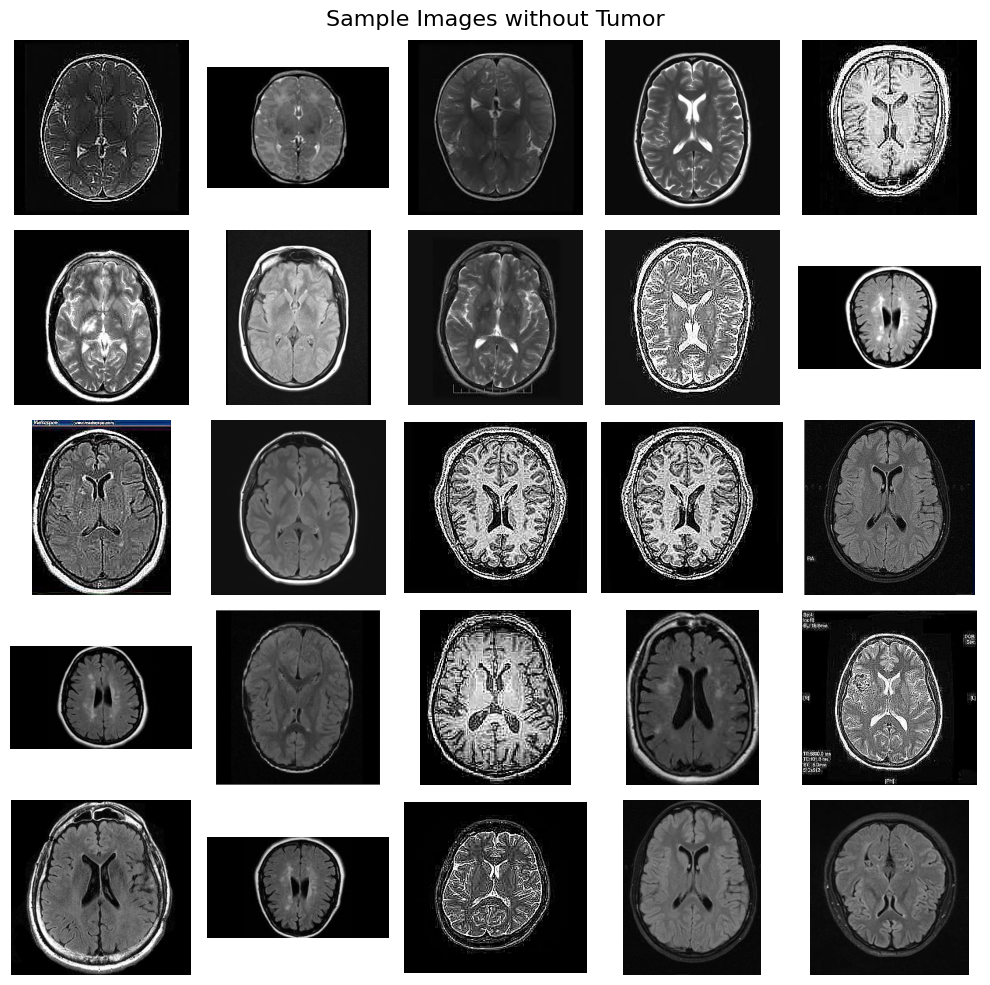

In [ ]:
notumor_dir="dataset/Training/notumor/"
image_fol= os.listdir(notumor_dir)

plt.figure(figsize=(10, 10))

for i in range(25):
    image_p = os.path.join(notumor_dir, image_fol[i])
    image = cv2.imread(image_p)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.suptitle('Sample Images without Tumor', fontsize=16)
plt.tight_layout()
plt.show()

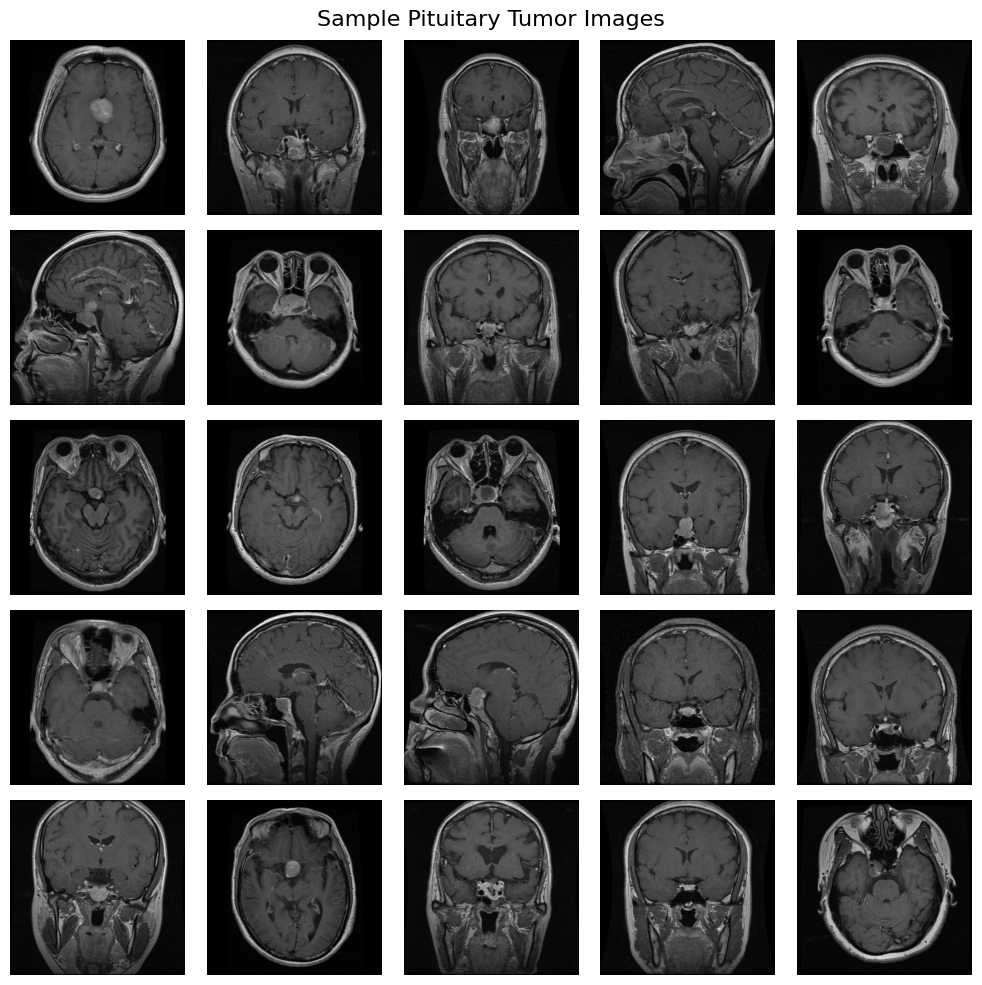

In [ ]:
pituitary_dir="dataset/Training/pituitary/"
image_fol= os.listdir(pituitary_dir)

plt.figure(figsize=(10, 10))

for i in range(25):
    image_p = os.path.join(pituitary_dir, image_fol[i])
    image = cv2.imread(image_p)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.suptitle('Sample Pituitary Tumor Images', fontsize=16)
plt.tight_layout()
plt.show()

In [2]:
training_data="dataset/Training"
testing_data="dataset/Testing/"
validation_data="dataset/Testing/"

In [5]:
filepath=[]
label=[]
image_folder=os.listdir(training_data)
for folder in image_folder:
    folder_path=os.path.join(training_data,folder)
    filelist=os.listdir(folder_path)
    for file in filelist:
        new_path=os.path.join(folder_path,file)
        filepath.append(new_path)
        label.append(folder)


image_data=pd.Series(filepath,name="image_data")
label_data=pd.Series(label,name="label")
train_dataset=pd.concat([image_data,label_data],axis=1)
train_dataset.head()

,image_data,label
0,dataset/Training\glioma\Tr-glTr_0000.jpg,glioma
1,dataset/Training\glioma\Tr-glTr_0001.jpg,glioma
2,dataset/Training\glioma\Tr-glTr_0002.jpg,glioma
3,dataset/Training\glioma\Tr-glTr_0003.jpg,glioma
4,dataset/Training\glioma\Tr-glTr_0004.jpg,glioma


In [6]:
train_dataset.shape

(5712, 2)

In [7]:
train_dataset.isnull().sum()

image_data    0
label         0
dtype: int64

In [8]:
train_dataset["label"].value_counts()

notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: label, dtype: int64

In [9]:
filepath=[]
label=[]
image_folder=os.listdir(testing_data)
for folder in image_folder:
    folder_path=os.path.join(testing_data,folder)
    filelist=os.listdir(folder_path)
    for file in filelist:
        new_path=os.path.join(folder_path,file)
        filepath.append(new_path)
        label.append(folder)


image_data=pd.Series(filepath,name="image_data")
label_data=pd.Series(label,name="label")
test_dataset=pd.concat([image_data,label_data],axis=1)
test_dataset.head()

,image_data,label
0,dataset/Testing/glioma\Te-glTr_0000.jpg,glioma
1,dataset/Testing/glioma\Te-glTr_0001.jpg,glioma
2,dataset/Testing/glioma\Te-glTr_0002.jpg,glioma
3,dataset/Testing/glioma\Te-glTr_0003.jpg,glioma
4,dataset/Testing/glioma\Te-glTr_0004.jpg,glioma


In [10]:
test_dataset.shape

(1311, 2)

In [11]:
test_dataset.isnull().sum()

image_data    0
label         0
dtype: int64

In [12]:
test_dataset["label"].value_counts()

notumor       405
meningioma    306
pituitary     300
glioma        300
Name: label, dtype: int64

In [13]:
filepath=[]
label=[]
image_folder=os.listdir(validation_data)
for folder in image_folder:
    folder_path=os.path.join(validation_data,folder)
    filelist=os.listdir(folder_path)
    for file in filelist:
        new_path=os.path.join(folder_path,file)
        filepath.append(new_path)
        label.append(folder)


image_data=pd.Series(filepath,name="image_data")
label_data=pd.Series(label,name="label")
valid_dataset=pd.concat([image_data,label_data],axis=1)
valid_dataset.head()

,image_data,label
0,dataset/Testing/glioma\Te-glTr_0000.jpg,glioma
1,dataset/Testing/glioma\Te-glTr_0001.jpg,glioma
2,dataset/Testing/glioma\Te-glTr_0002.jpg,glioma
3,dataset/Testing/glioma\Te-glTr_0003.jpg,glioma
4,dataset/Testing/glioma\Te-glTr_0004.jpg,glioma


In [14]:
valid_dataset.shape

(1311, 2)

In [15]:
valid_dataset["label"].value_counts()

notumor       405
meningioma    306
pituitary     300
glioma        300
Name: label, dtype: int64

In [16]:
batch_size=16
color_channel=3
image_shape=(224,224,3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1./255,)

test_generator=ImageDataGenerator(rescale=1./255)

train_data_generator=train_generator.flow_from_dataframe(train_dataset,x_col="image_data",y_col="label",
                                                        target_size=image_shape[:2],
                                                        color_mode="rgb",
                                                        shuffle=True,
                                                        batch_size=batch_size)

test_data_generator=test_generator.flow_from_dataframe(test_dataset,x_col="image_data",y_col="label",
                                                        target_size=image_shape[:2],
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size=batch_size)

valid_data_generator=test_generator.flow_from_dataframe(valid_dataset,x_col="image_data",y_col="label",
                                                        target_size=image_shape[:2],
                                                        color_mode="rgb",
                                                        shuffle=True,
                                                        batch_size=batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_dataset["label"].unique()), activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('ResNet_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    train_data_generator,
    epochs=100,
    validation_data=valid_data_generator,
    callbacks=[checkpoint, early_stopping]
)


test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/100
357/357 [==============================] - ETA: 0s - loss: 1.1206 - accuracy: 0.6084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 755s 2s/step - loss: 1.1206 - accuracy: 0.6084 - val_loss: 0.8824 - val_accuracy: 0.6636
Epoch 2/100
357/357 [==============================] - 45s 127ms/step - loss: 0.8266 - accuracy: 0.6801 - val_loss: 0.6396 - val_accuracy: 0.7506
Epoch 3/100
357/357 [==============================] - 48s 133ms/step - loss: 0.7178 - accuracy: 0.7223 - val_loss: 0.6092 - val_accuracy: 0.7445
Epoch 4/100
357/357 [==============================] - 44s 123ms/step - loss: 0.6730 - accuracy: 0.7416 - val_loss: 0.5712 - val_accuracy: 0.7536
Epoch 5/100
357/357 [==============================] - 45s 125ms/step - loss: 0.6307 - accuracy: 0.7528 - val_loss: 0.5117 - val_accuracy: 0.7857
Epoch 6/100
357/357 [==============================] - 43s 120ms/step - loss: 0.6101 - accuracy: 0.7635 - val_loss: 0.5271 - val_accuracy: 0.7872
Epoch 7/100
357/357 [==============================] - 42s 116ms/step - loss: 0.6082 - accuracy: 0.7654 - val_loss: 0.5285 - val_accuracy:

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_dataset["label"].unique()), activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('inceptionv3_model.h5', monitor='val_loss', save_best_only=True, mode='min')


history = model.fit(
    train_data_generator,
    epochs=100,
    validation_data=valid_data_generator,
    callbacks=[checkpoint]
)


test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/100
357/357 [==============================] - 48s 121ms/step - loss: 0.6515 - accuracy: 0.7691 - val_loss: 0.4342 - val_accuracy: 0.8360
Epoch 2/100
357/357 [==============================] - 43s 119ms/step - loss: 0.4146 - accuracy: 0.8458 - val_loss: 0.3930 - val_accuracy: 0.8444
Epoch 3/100
357/357 [==============================] - 41s 114ms/step - loss: 0.3551 - accuracy: 0.8629 - val_loss: 0.3979 - val_accuracy: 0.8314
Epoch 4/100
357/357 [==============================] - 40s 113ms/step - loss: 0.3228 - accuracy: 0.8782 - val_loss: 0.3106 - val_accuracy: 0.8780
Epoch 5/100
357/357 [==============================] - 40s 112ms/step - loss: 0.2913 - accuracy: 0.8866 - val_loss: 0.3131 - val_accuracy: 0.8772
Epoch 6/100
357/357 [==============================] - 43s 120ms/step - loss: 0.2698 - accuracy: 0.8962 - val_loss: 0.2405 - val_accuracy: 0.9054
Epoch 7/100
357/357 [==============================] - 42s 118ms/step - loss: 0.2581 - accuracy: 0.9013 - val_loss: 0.2368 -

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_dataset["label"].unique()), activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('VGG16_modelnewf.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    train_data_generator,
    epochs=30,
    validation_data=valid_data_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/30
357/357 [==============================] - ETA: 0s - loss: 3.5824 - accuracy: 0.5240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 1115s 3s/step - loss: 3.5824 - accuracy: 0.5240 - val_loss: 1.2767 - val_accuracy: 0.3166 - lr: 0.0010
Epoch 2/30
357/357 [==============================] - 108s 302ms/step - loss: 0.8959 - accuracy: 0.6758 - val_loss: 1.0954 - val_accuracy: 0.5408 - lr: 0.0010
Epoch 3/30
357/357 [==============================] - 110s 308ms/step - loss: 0.7590 - accuracy: 0.7213 - val_loss: 0.6954 - val_accuracy: 0.7216 - lr: 0.0010
Epoch 4/30
357/357 [==============================] - 94s 262ms/step - loss: 0.6670 - accuracy: 0.7525 - val_loss: 0.7379 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 5/30
357/357 [==============================] - 123s 345ms/step - loss: 0.6298 - accuracy: 0.7708 - val_loss: 0.6475 - val_accuracy: 0.7605 - lr: 0.0010
Epoch 6/30
357/357 [==============================] - 94s 262ms/step - loss: 0.5692 - accuracy: 0.7903 - val_loss: 0.7180 - val_accuracy: 0.7147 - lr: 0.0010
Epoch 7/30
357/357 [==============================] - 123s 34

In [18]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_dataset["label"].unique()), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('/content/drive/MyDrive/aswathybrain/vgg16.keras',
                              monitor='val_loss',
                              save_best_only=True,
                              mode='min',
                              verbose=1)

history = model.fit(
    train_data_generator,
    epochs=30,
    validation_data=valid_data_generator,
    callbacks=[checkpoint]
)

model.save('/content/drive/MyDrive/aswathybrain/vgg16pre.h5')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5706 - loss: 1.0020
Epoch 1: val_loss improved from inf to 0.62541, saving model to /content/drive/MyDrive/aswathybrain/vgg16.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 4372s 12s/step - accuracy: 0.5708 - loss: 1.0015 - val_accuracy: 0.7506 - val_loss: 0.6254
Epoch 2/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7468 - loss: 0.6469
Epoch 2: val_loss improved from 0.62541 to 0.54075, saving model to /content/drive/MyDrive/aswathybrain/vgg16.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.7468 - loss: 0.6468 - val_accuracy: 0.7979 - val_loss: 0.5407
Epoch 3/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7710 - loss: 0.5993
Epoch 3: val_loss improved from 0.54075 to 0.53587, saving model to /content/drive/MyDrive/aswathybrain/vgg16.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.7710 - loss: 0.5993 - val_accuracy: 0.7956 - val_loss: 0.5359
Epoch 4/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms

In [19]:
model_path = 'VGG16_model.h5'
model = load_model(model_path,compile=False)

def preprocess_image(image_p, target_size=(224, 224)):
    image = load_img(image_p, target_size=target_size)
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_p):
    img_array = preprocess_image(image_p)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    class_labels = list(train_data_generator.class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label


image_p = 'dataset\Testing\meningioma\Te-me_0020.jpg'
predicted_label = predict_image(image_p)
print(f'The predicted label for the image is: {predicted_label}')


The predicted label for the image is: meningioma


In [ ]:
from tensorflow.keras.models import load_model

resnet_model_path = 'ResNet_model.h5'
inception_model_path = 'inceptionv3_model.h5'
vgg16_model_path = 'VGG16_model.h5'

resnet_model = load_model(resnet_model_path,compile=False)
inception_model = load_model(inception_model_path,compile=False)
vgg16_model = load_model(vgg16_model_path,compile=False)


In [17]:
def predict_images(model, dataset, class_labels):
    y_true = []
    y_pred = []
    for idx, row in dataset.iterrows():
        image_p = row['image_data']
        true_label = row['label']
        image = load_and_preprocess_image(image_p)
        predictions = model.predict(image)
        predicted_class = np.argmax(predictions)
        predicted_label = class_labels[predicted_class]
        y_true.append(true_label)
        y_pred.append(predicted_label)
    return y_true, y_pred

class_labels = train_dataset["label"].unique()

In [18]:
def load_and_preprocess_image(image_p, target_size=(224, 224)):
   image = cv2.imread(image_p)
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
   image = cv2.resize(image, target_size)
   image = img_to_array(image) / 255.0 
   image = np.expand_dims(image, axis=0)  
   return image

In [ ]:
y_true_resnet, y_pred_resnet = predict_images(resnet_model, test_dataset, class_labels)
y_true_inception, y_pred_inception = predict_images(inception_model, test_dataset, class_labels)
y_true_vgg16, y_pred_vgg16 = predict_images(vgg16_model, test_dataset, class_labels)



In [ ]:
conf_matrix_resnet = confusion_matrix(y_true_resnet, y_pred_resnet, labels=class_labels)
conf_matrix_inception = confusion_matrix(y_true_inception, y_pred_inception, labels=class_labels)
conf_matrix_vgg16 = confusion_matrix(y_true_vgg16, y_pred_vgg16, labels=class_labels)


In [ ]:
print("ResNet Classification Report:")
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_labels))



ResNet Classification Report:
              precision    recall  f1-score   support

      glioma       0.87      0.82      0.84       300
  meningioma       0.80      0.83      0.82       306
     notumor       0.99      0.98      0.98       405
   pituitary       0.95      0.98      0.97       300

    accuracy                           0.91      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



In [ ]:
print("InceptionV3 Classification Report:")
print(classification_report(y_true_inception, y_pred_inception, target_names=class_labels))



InceptionV3 Classification Report:
              precision    recall  f1-score   support

      glioma       0.95      0.91      0.93       300
  meningioma       0.92      0.92      0.92       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.96      0.99      0.97       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



In [ ]:
print("VGG16 Classification Report:")
print(classification_report(y_true_vgg16, y_pred_vgg16, target_names=class_labels))



VGG16 Classification Report:
              precision    recall  f1-score   support

      glioma       0.92      0.97      0.94       300
  meningioma       0.97      0.88      0.92       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



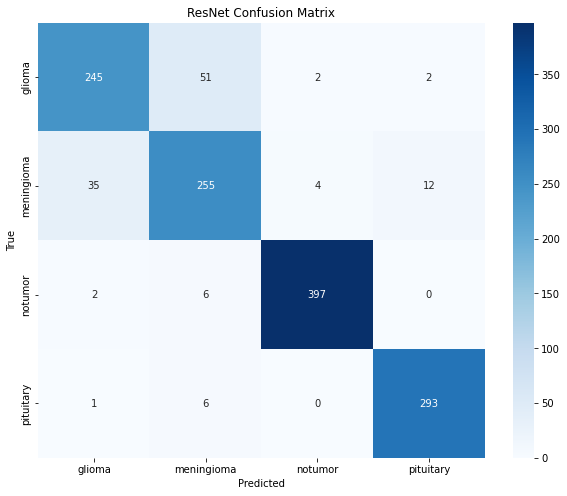

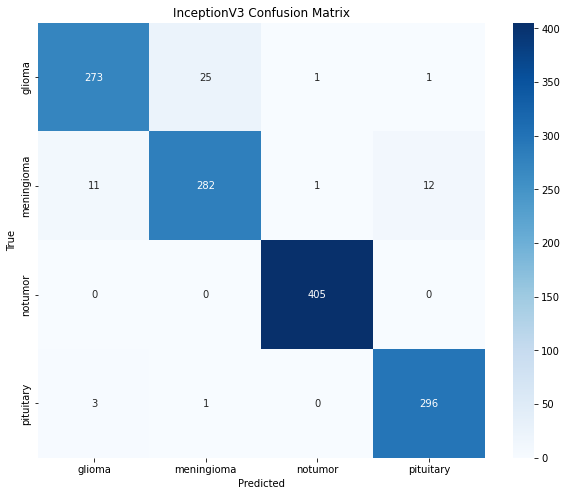

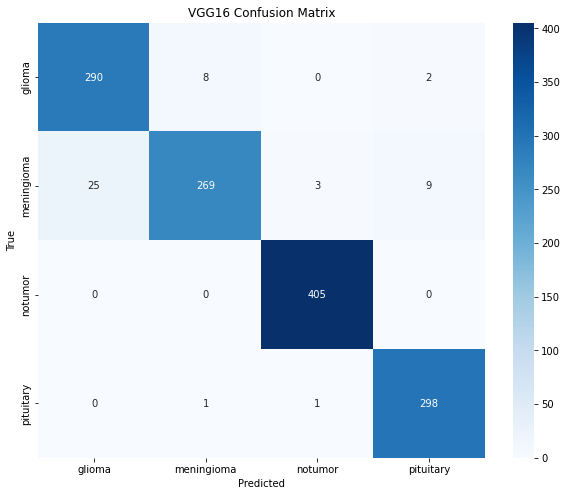

In [ ]:

def plot_confusion_matrix(conf_matrix, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix_resnet, class_labels, 'ResNet Confusion Matrix')
plot_confusion_matrix(conf_matrix_inception, class_labels, 'InceptionV3 Confusion Matrix')
plot_confusion_matrix(conf_matrix_vgg16, class_labels, 'VGG16 Confusion Matrix')

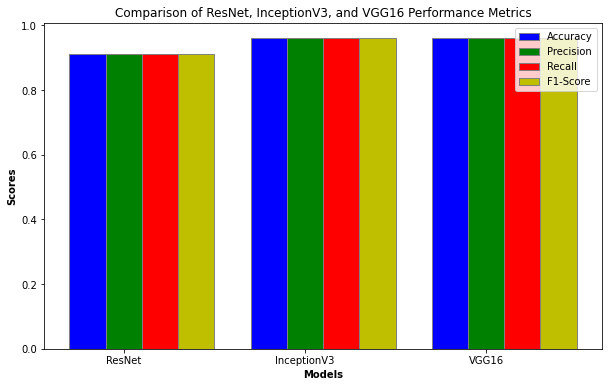

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['ResNet', 'InceptionV3', 'VGG16']
accuracy = [0.91, 0.96, 0.96]
precision = [0.91, 0.96, 0.96]
recall = [0.91, 0.96, 0.96]
f1_score = [0.91, 0.96, 0.96]

bar_width = 0.2

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))

plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Comparison of ResNet, InceptionV3, and VGG16 Performance Metrics')
plt.legend()

plt.show()


In [24]:
path='vgg16pre.h5'
pre=load_model(path,compile=False)
y_true_vgg16pre, y_pred_vgg16pre = predict_images(pre, test_dataset, class_labels)


In [25]:
print("VGG16 pre-trained model Classification Report:")
print(classification_report(y_true_vgg16pre, y_pred_vgg16pre, target_names=class_labels))



VGG16 pre-trained model Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.60      0.74       300
  meningioma       0.66      0.81      0.73       306
     notumor       0.91      0.95      0.93       405
   pituitary       0.89      0.98      0.93       300

    accuracy                           0.84      1311
   macro avg       0.86      0.83      0.83      1311
weighted avg       0.86      0.84      0.84      1311



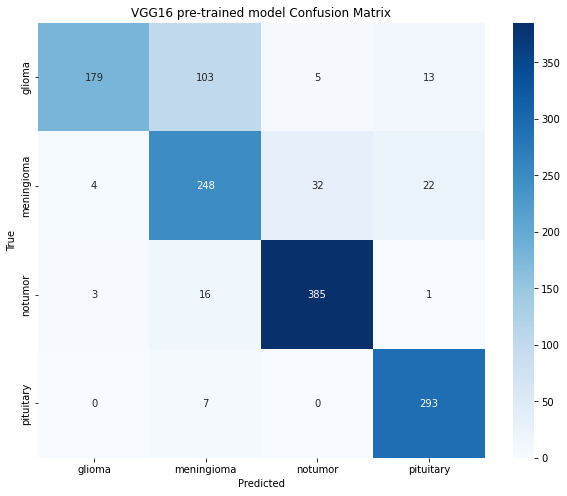

In [26]:
conf_matrix_vgg16pre = confusion_matrix(y_true_vgg16pre, y_pred_vgg16pre, labels=class_labels)

def plot_confusion_matrix(conf_matrix, class_labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()
plot_confusion_matrix(conf_matrix_vgg16pre, class_labels, 'VGG16 pre-trained model Confusion Matrix')

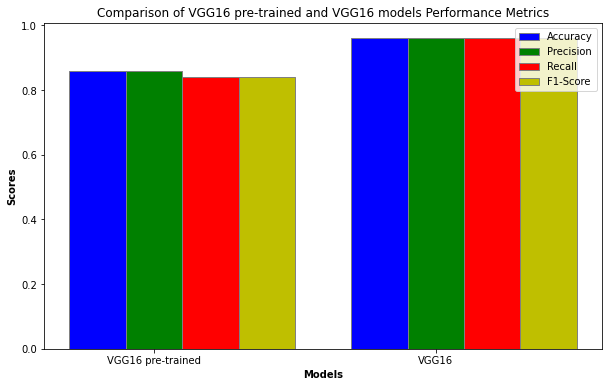

In [28]:
models = ['VGG16 pre-trained', 'VGG16']
accuracy = [ 0.86, 0.96]
precision = [ 0.86, 0.96]
recall = [ 0.84, 0.96]
f1_score = [ 0.84, 0.96]

bar_width = 0.2

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))

plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1-Score')


plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.title('Comparison of VGG16 pre-trained and VGG16 models Performance Metrics')
plt.legend()

plt.show()


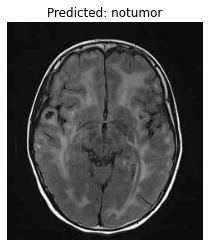

Prediction probabilities: [[1.7566140e-24 7.9197356e-17 1.0000000e+00 3.8081762e-23]]


In [6]:
model_path = 'VGG16_model.h5'
model = load_model(model_path,compile=False)

def load_and_preprocess_image(image_p, target_size=(224, 224)):
   image = cv2.imread(image_p)
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
   image = cv2.resize(image, target_size)
   image = img_to_array(image) / 255.0  
   image = np.expand_dims(image, axis=0)  
    returnimage

def predict_image(model, image_p, class_labels):
   image = load_and_preprocess_image(image_p)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    predicted_label = class_labels[predicted_class]
    return predicted_label, predictions


class_labels = ["glioma","meningioma","notumor","pituitary"]

image_p = 'dataset/Testing/notumor/Te-no_0019.jpg'

predicted_label, predictions = predict_image(model, image_p, class_labels)

image = cv2.imread(image_p)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()

print(f'Prediction probabilities: {predictions}')
